In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
# Load the cleaned data
data = pd.read_csv('cleaned_data.csv')

In [20]:
# Print all column names to verify
print("Columns in the DataFrame:")
print(data.columns)

Columns in the DataFrame:
Index(['Country', 'latest year available_x', 'CH4 emissions',
       'CH4 emissions per capita', ' % change since 1990', 'N2O emissions',
       'N2O emissions per capita', ' % change since 1990.1', 'NOx emissions',
       '% change since 1990_x', 'NOx emissions per capita', 'CO2 emissions ',
       '% change since 1990_y', 'CO2 emissions per capita',
       'CO2 emissions per km2', 'Total GHG emissions _perc',
       'GHG from Energy_perc',
       'GHG from Energy \nof which: from Transport_perc',
       'GHG from Industrial Processes_perc', 'GHG from Agriculture_perc',
       'GHG from Waste_perc', 'Total GHG emissions _tonnes',
       'GHG from Energy_tonnes',
       'GHG from Energy \nof which: from Transport_tonnes',
       'GHG from Industrial Processes_tonnes', 'GHG from Agriculture_tonnes',
       'GHG from Waste_tonnes', 'Consumption of CFCs_odptonnes',
       'Consumption of all ODS', 'consumptionof all_odptonnesin 2013',
       'reduction in odp', '

In [22]:
# List of columns to normalize (update this list based on actual column names)
columns_to_normalize = [
    'CH4 emissions', 'CH4 emissions per capita', ' % change since 1990',
    'N2O emissions', 'N2O emissions per capita', ' % change since 1990.1',
    'NOx emissions', '% change since 1990_x', 'NOx emissions per capita',
    'CO2 emissions ', '% change since 1990_y', 'CO2 emissions per capita',
    'CO2 emissions per km2', 'Total GHG emissions _perc', 'GHG from Energy_perc',
    '"GHG from Energy of which: from Transport_perc"', 'GHG from Industrial Processes_perc',
    'GHG from Agriculture_perc', 'GHG from Waste_perc', 'Total GHG emissions _tonnes',
    'GHG from Energy_tonnes', '"GHG from Energy of which: from Transport_tonnes"',
    'GHG from Industrial Processes_tonnes', 'GHG from Agriculture_tonnes', 'GHG from Waste_tonnes',
    'Consumption of CFCs_odptonnes', 'Consumption of all ODS', 'consumptionof all_odptonnesin 2013',
    'reduction in odp', 'SO2 emissions', '% change since 1990', 'SO2 emissions per capita'
]

In [24]:
# Check for columns that exist in the DataFrame
valid_columns = [col for col in columns_to_normalize if col in data.columns]
missing_cols = [col for col in columns_to_normalize if col not in data.columns]
print("Missing columns:")
print(missing_cols)

Missing columns:
['"GHG from Energy of which: from Transport_perc"', '"GHG from Energy of which: from Transport_tonnes"']


In [26]:
# Function to clean non-numeric values in a column
def clean_numeric(column):
    # Replace commas and spaces in the entire column
    column = column.str.replace(',', '', regex=False)
    column = column.str.replace(' ', '', regex=False)
    # Convert to numeric, forcing errors to NaN
    return pd.to_numeric(column, errors='coerce')

In [28]:
# Apply cleaning function to valid columns
for col in valid_columns:
    data[col] = data[col].astype(str)  # Ensure column is treated as strings
    data[col] = clean_numeric(data[col])  # Apply cleaning function

# Handle any NaNs in valid columns
data[valid_columns] = data[valid_columns].fillna(0)

# Normalize the data
scaler = MinMaxScaler()
data[valid_columns] = scaler.fit_transform(data[valid_columns])

In [30]:
# Prepare data 
X = data[valid_columns]

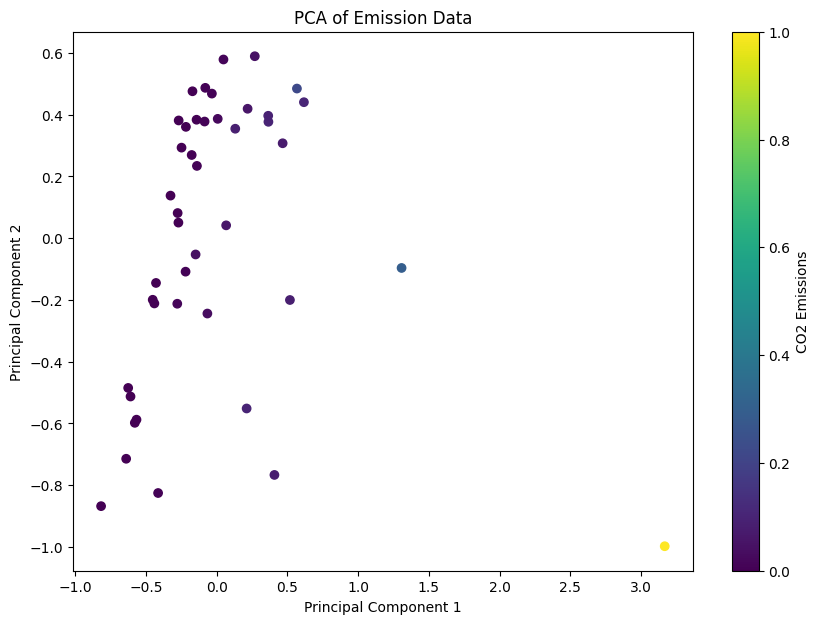

Explained Variance by Principal Component 1: 0.34
Explained Variance by Principal Component 2: 0.17


In [26]:

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plot PCA results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['CO2 emissions '], cmap='viridis')
plt.colorbar(label='CO2 Emissions')
plt.title('PCA of Emission Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print(f'Explained Variance by Principal Component 1: {explained_variance[0]:.2f}')
print(f'Explained Variance by Principal Component 2: {explained_variance[1]:.2f}')

Epoch 1/100


C:\Users\minal\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0082
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0070
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0059
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0065
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0058
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0064
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0056
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0063
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0061
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0061
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0061
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0053 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0060
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0057
Epoch 16/100
2/2 ━━━━━━━━━━━━━━

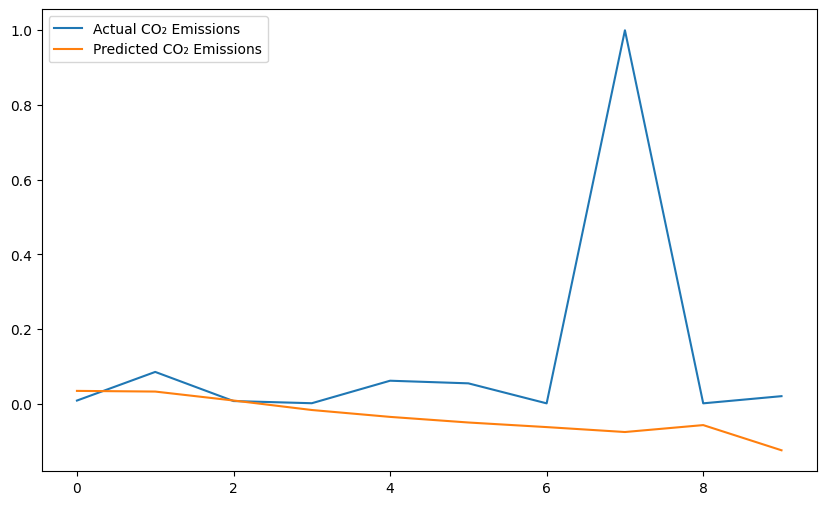

Mean Squared Error (MSE): 0.11771341085785052
Root Mean Squared Error (RMSE): 0.34309388053104434
Mean Absolute Error (MAE): 0.17082083003785606


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Prepare data for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

data_CO2 = data['CO2 emissions '].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data_CO2)

look_back = 10
X, y = create_dataset(data_scaled, look_back)
X = X.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test = X[:-10], X[-10:]
y_train, y_test = y[:-10], y[-10:]

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=1)

# Make predictions
predictions = lstm_model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data_CO2[-10:], label='Actual CO₂ Emissions')
plt.plot(predictions, label='Predicted CO₂ Emissions')
plt.legend()
plt.show()

mse = mean_squared_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

Epoch 1/30


C:\Users\minal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0370
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0158 
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0104 
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064 
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036 
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014     
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6189e-04 
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0010 
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2068e-04 
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1234e-04 
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.0830e-04 
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.6291e-04 
Epoch 16/30
4/4 ━━━━━━

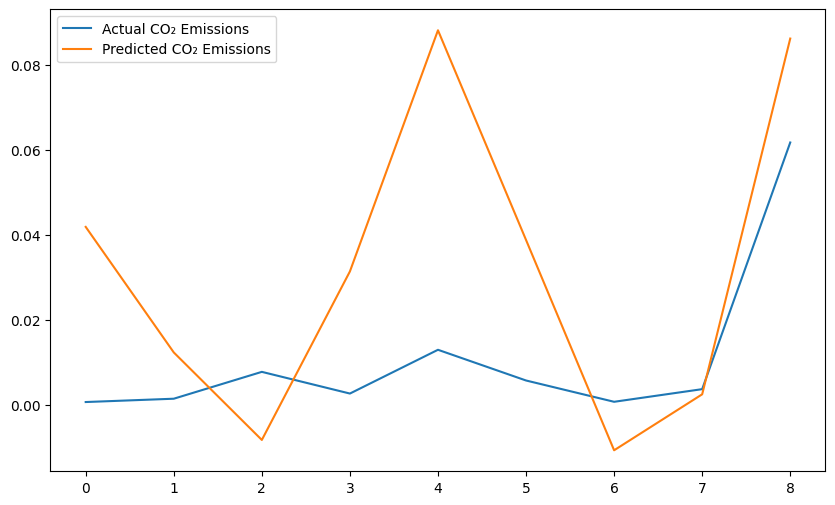

Mean Squared Error (MSE): 0.001151512867330171
Root Mean Squared Error (RMSE): 0.03393394859620924
Mean Absolute Error (MAE): 0.02689476781745063


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Prepare data for ANN
X = data[valid_columns]
y = data['CO2 emissions ']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1))
ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train, y_train, epochs=30, batch_size=10, verbose=1)

# Make predictions
ann_predictions = ann_model.predict(X_test)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual CO₂ Emissions')
plt.plot(ann_predictions[:80], label='Predicted CO₂ Emissions')
plt.legend()
plt.show()

# Calculate error metrics
mse = mean_squared_error(y_test, ann_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ann_predictions)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

In [25]:
pip install geopandas


Note: you may need to restart the kernel to use updated packages.


Data Columns: Index(['Country', 'latest year available_x', 'CH4 emissions',
       'CH4 emissions per capita', ' % change since 1990', 'N2O emissions',
       'N2O emissions per capita', ' % change since 1990.1', 'NOx emissions',
       '% change since 1990_x', 'NOx emissions per capita', 'CO2 emissions ',
       '% change since 1990_y', 'CO2 emissions per capita',
       'CO2 emissions per km2', 'Total GHG emissions _perc',
       'GHG from Energy_perc',
       'GHG from Energy \nof which: from Transport_perc',
       'GHG from Industrial Processes_perc', 'GHG from Agriculture_perc',
       'GHG from Waste_perc', 'Total GHG emissions _tonnes',
       'GHG from Energy_tonnes',
       'GHG from Energy \nof which: from Transport_tonnes',
       'GHG from Industrial Processes_tonnes', 'GHG from Agriculture_tonnes',
       'GHG from Waste_tonnes', 'Consumption of CFCs_odptonnes',
       'Consumption of all ODS', 'consumptionof all_odptonnesin 2013',
       'reduction in odp', 'SO2 emission

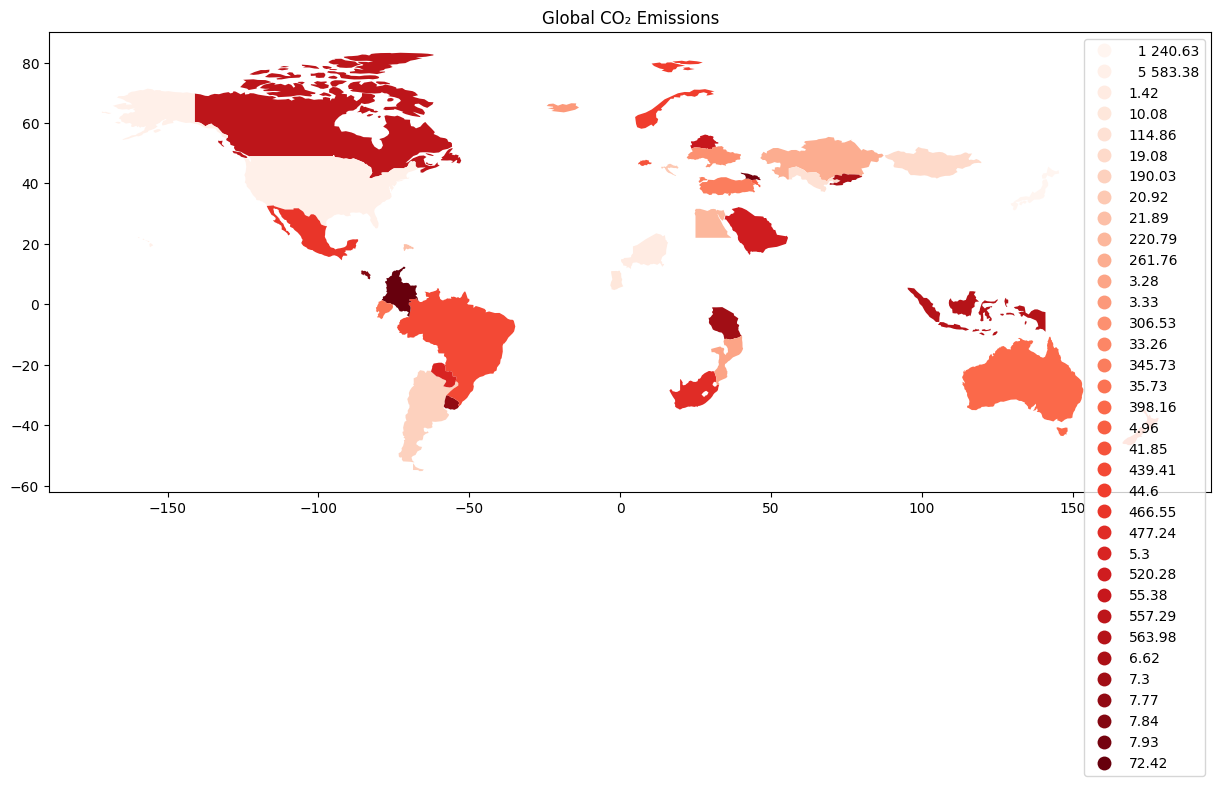

In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

def load_world_map(shapefile_path):
    try:
        world = gpd.read_file(shapefile_path)
        return world
    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

def plot_emissions(world, data):
    if world is not None:
        # Rename 'ADMIN' to 'Country' if needed
        if 'ADMIN' in world.columns:
            world = world.rename(columns={'ADMIN': 'Country',})
        else:
            print("Error: The world map does not have a suitable column for country names.")
            return

        # Ensure the cleaned data has a 'Country' column
        if 'Country' not in data.columns:
            print("Error: The cleaned data does not have a 'Country' column.")
            return

        # Print column names for debugging
        print("Data Columns:", data.columns)
        print("World Map Columns:", world.columns)

        # Merge on 'Country' column
        world = world.merge(data,how='left',on='Country',)
        print(world.head())

        # Check if 'CO2 emissions' exists in the merged DataFrame
        if 'CO2 emissions ' in world.columns:
            # Plot emissions data
            world.plot(column='CO2 emissions ', cmap='Reds', legend=True, figsize=(15, 10))
            plt.title('Global CO₂ Emissions')
            plt.show()
        else:
            print("Error: The 'CO2 emissions' column is not in the world map DataFrame after merging.")
    else:
        print("World map could not be loaded.")

# Load cleaned data
try:
    data = pd.read_csv('cleaned_data.csv')
except Exception as e:
    print(f"Error loading cleaned data: {e}")
    data = pd.DataFrame()  # Empty DataFrame if loading fails

# Load world map
shapefile_path = 'ne_110m_admin_0_countries.shp'
world = load_world_map(shapefile_path)


# Plot emissions data
plot_emissions(world, data)


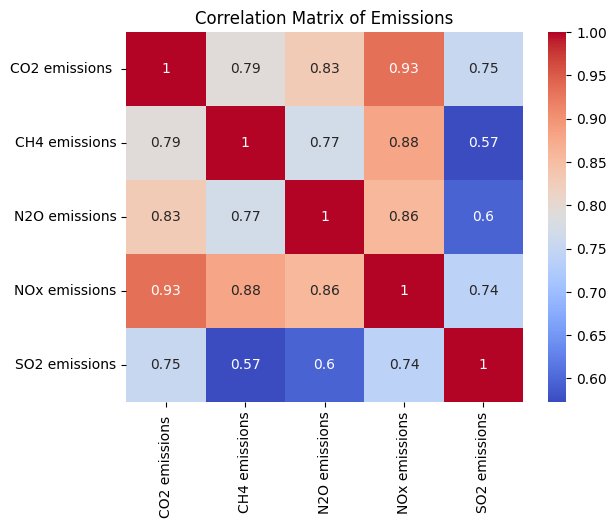

In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to clean numeric columns by removing spaces and converting to float
def clean_numeric_column(column):
    # Remove spaces
    column = column.str.replace(' ', '')
    # Convert to numeric, coercing errors to NaN
    return pd.to_numeric(column, errors='coerce')

# List of columns to clean
columns_to_clean = ['CO2 emissions ', 'CH4 emissions', 'N2O emissions', 'NOx emissions', 'SO2 emissions']

# Clean the columns
for col in columns_to_clean:
    data[col] = clean_numeric_column(data[col].astype(str))

# Now calculate the correlation matrix
correlation_matrix = data[columns_to_clean].corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Emissions')
plt.show()


In [109]:
# Historical policy assessment
data['Policy_Effect'] = data['CO2 emissions '].pct_change()

# Simulate new policies
def simulate_policy_change(current_emissions, reduction_percentage):
    return current_emissions * (1 - reduction_percentage / 100)

# Example policy simulation
future_emissions = simulate_policy_change(data['CO2 emissions '].iloc[-1], 25)
print(f'Projected CO₂ Emissions with 25% reduction: {future_emissions}')


Projected CO₂ Emissions with 25% reduction: 86.145
